In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_pre = pd.read_csv('media/wine.csv', header=None)

In [3]:
df = df_pre.sample(frac=0.3)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
4388,6.9,0.40,0.43,6.2,0.065,42.0,178.0,0.99552,3.11,0.53,9.4,5,0
5809,6.0,0.17,0.21,6.0,0.050,26.0,134.0,0.99390,3.08,0.54,9.8,6,0
2157,5.9,0.21,0.24,12.1,0.044,53.0,165.0,0.99690,3.25,0.39,9.5,5,0
5384,5.6,0.19,0.31,2.7,0.027,11.0,100.0,0.98964,3.46,0.40,13.2,7,0
1119,5.6,0.66,0.00,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9,5,1


In [4]:
dataset = df.values
X = dataset[:, 0:12].astype(float)
y = dataset[:, 12].astype(float)

In [5]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X, y, validation_split=0.33, epochs=3500, batch_size=500)

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

--> history에 학습 데이터를 받아 그래프 그리는 코드

- 학습이 진행되어도 테스트셋 오차가 줄지 않을 때, 학습을 멈추는 방법

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

Epoch 1/2000
4/4 [==============================] - 0s 55ms/step - loss: 1.4934 - accuracy: 0.1873 - val_loss: 0.9487 - val_accuracy: 0.1667
Epoch 2/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.8805 - accuracy: 0.2040 - val_loss: 0.7941 - val_accuracy: 0.1795
Epoch 3/2000
4/4 [==============================] - 0s 8ms/step - loss: 0.7794 - accuracy: 0.1944 - val_loss: 0.7436 - val_accuracy: 0.1744
Epoch 4/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.7347 - accuracy: 0.2001 - val_loss: 0.7104 - val_accuracy: 0.2436
Epoch 5/2000
4/4 [==============================] - 0s 7ms/step - loss: 0.7050 - accuracy: 0.3329 - val_loss: 0.6892 - val_accuracy: 0.6795
Epoch 6/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.7293 - val_loss: 0.6763 - val_accuracy: 0.8128
Epoch 7/2000
4/4 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.7864 - val_loss: 0.6682 - val_accuracy: 0.8154
Epoch 8/2000
4/4 [

4/4 [==============================] - 0s 5ms/step - loss: 0.1844 - accuracy: 0.9384 - val_loss: 0.1703 - val_accuracy: 0.9359
Epoch 59/2000
4/4 [==============================] - 0s 6ms/step - loss: 0.1839 - accuracy: 0.9391 - val_loss: 0.1701 - val_accuracy: 0.9385
Epoch 60/2000
4/4 [==============================] - 0s 6ms/step - loss: 0.1836 - accuracy: 0.9397 - val_loss: 0.1702 - val_accuracy: 0.9359
Epoch 61/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 0.9403 - val_loss: 0.1687 - val_accuracy: 0.9359
Epoch 62/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1828 - accuracy: 0.9403 - val_loss: 0.1681 - val_accuracy: 0.9385
Epoch 63/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1820 - accuracy: 0.9397 - val_loss: 0.1676 - val_accuracy: 0.9359
Epoch 64/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1818 - accuracy: 0.9410 - val_loss: 0.1699 - val_accuracy: 0.9410
Epoch 65/2000
4/4 [========

4/4 [==============================] - 0s 5ms/step - loss: 0.1471 - accuracy: 0.9525 - val_loss: 0.1387 - val_accuracy: 0.9513
Epoch 117/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1467 - accuracy: 0.9532 - val_loss: 0.1322 - val_accuracy: 0.9487
Epoch 118/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1435 - accuracy: 0.9525 - val_loss: 0.1328 - val_accuracy: 0.9513
Epoch 119/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 0.9506 - val_loss: 0.1311 - val_accuracy: 0.9513
Epoch 120/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1441 - accuracy: 0.9506 - val_loss: 0.1331 - val_accuracy: 0.9436
Epoch 121/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1433 - accuracy: 0.9487 - val_loss: 0.1405 - val_accuracy: 0.9487
Epoch 122/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9525 - val_loss: 0.1280 - val_accuracy: 0.9538
Epoch 123/2000
4/4 [=

Epoch 174/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1032 - accuracy: 0.9609 - val_loss: 0.1166 - val_accuracy: 0.9641
Epoch 175/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9666 - val_loss: 0.0999 - val_accuracy: 0.9615
Epoch 176/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0953 - accuracy: 0.9686 - val_loss: 0.0990 - val_accuracy: 0.9590
Epoch 177/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9679 - val_loss: 0.0971 - val_accuracy: 0.9615
Epoch 178/2000
4/4 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.97 - 0s 5ms/step - loss: 0.0921 - accuracy: 0.9679 - val_loss: 0.0969 - val_accuracy: 0.9615
Epoch 179/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0930 - accuracy: 0.9660 - val_loss: 0.1028 - val_accuracy: 0.9718
Epoch 180/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9750 - val_

4/4 [==============================] - 0s 4ms/step - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0.0806 - val_accuracy: 0.9692
Epoch 232/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0763 - accuracy: 0.9737 - val_loss: 0.0810 - val_accuracy: 0.9667
Epoch 233/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0750 - accuracy: 0.9743 - val_loss: 0.0797 - val_accuracy: 0.9744
Epoch 234/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9737 - val_loss: 0.0806 - val_accuracy: 0.9744
Epoch 235/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9756 - val_loss: 0.0820 - val_accuracy: 0.9769
Epoch 236/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0769 - accuracy: 0.9731 - val_loss: 0.0849 - val_accuracy: 0.9641
Epoch 237/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9737 - val_loss: 0.1040 - val_accuracy: 0.9769
Epoch 238/2000
4/4 [=

4/4 [==============================] - 0s 5ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 289/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.0697 - val_accuracy: 0.9744
Epoch 290/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9763 - val_loss: 0.0687 - val_accuracy: 0.9718
Epoch 291/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9756 - val_loss: 0.0677 - val_accuracy: 0.9795
Epoch 292/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0665 - accuracy: 0.9808 - val_loss: 0.0675 - val_accuracy: 0.9744
Epoch 293/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0643 - accuracy: 0.9756 - val_loss: 0.0675 - val_accuracy: 0.9795
Epoch 294/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0636 - accuracy: 0.9820 - val_loss: 0.0669 - val_accuracy: 0.9769
Epoch 295/2000
4/4 [=

Epoch 346/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9820 - val_loss: 0.0671 - val_accuracy: 0.9795
Epoch 347/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0667 - val_accuracy: 0.9795
Epoch 348/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9852 - val_loss: 0.0702 - val_accuracy: 0.9795
Epoch 349/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9820 - val_loss: 0.0642 - val_accuracy: 0.9846
Epoch 350/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 0.9840 - val_loss: 0.0642 - val_accuracy: 0.9795
Epoch 351/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9801 - val_loss: 0.0713 - val_accuracy: 0.9718
Epoch 352/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9808 - val_loss: 0.0637 - val_accuracy: 0.9846
Epoch 

Epoch 404/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0612 - val_accuracy: 0.9846
Epoch 405/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0503 - accuracy: 0.9808 - val_loss: 0.0619 - val_accuracy: 0.9846
Epoch 406/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0444 - accuracy: 0.9840 - val_loss: 0.0662 - val_accuracy: 0.9821
Epoch 407/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0721 - val_accuracy: 0.9769
Epoch 408/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9788 - val_loss: 0.0628 - val_accuracy: 0.9795
Epoch 409/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0624 - val_accuracy: 0.9821
Epoch 410/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0661 - val_accuracy: 0.9795
Epoch 

4/4 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0588 - val_accuracy: 0.9795
Epoch 462/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0411 - accuracy: 0.9846 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 463/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9891 - val_loss: 0.0604 - val_accuracy: 0.9795
Epoch 464/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9840 - val_loss: 0.0588 - val_accuracy: 0.9795
Epoch 465/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9865 - val_loss: 0.0580 - val_accuracy: 0.9821
Epoch 466/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.0581 - val_accuracy: 0.9846
Epoch 467/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9865 - val_loss: 0.0605 - val_accuracy: 0.9795
Epoch 468/2000
4/4 [=

4/4 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9872 - val_loss: 0.0599 - val_accuracy: 0.9821
Epoch 519/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9846 - val_loss: 0.0621 - val_accuracy: 0.9795
Epoch 520/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9865 - val_loss: 0.0605 - val_accuracy: 0.9795
Epoch 521/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0598 - val_accuracy: 0.9821
Epoch 522/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0597 - val_accuracy: 0.9821
Epoch 523/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9852 - val_loss: 0.0597 - val_accuracy: 0.9821
Epoch 524/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0390 - accuracy: 0.9846 - val_loss: 0.0594 - val_accuracy: 0.9795
Epoch 525/2000
4/4 [=

4/4 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9878 - val_loss: 0.0569 - val_accuracy: 0.9795
Epoch 576/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9846 - val_loss: 0.0577 - val_accuracy: 0.9795
Epoch 577/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0548 - val_accuracy: 0.9795
Epoch 578/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9840 - val_loss: 0.0581 - val_accuracy: 0.9795
Epoch 579/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9865 - val_loss: 0.0536 - val_accuracy: 0.9872
Epoch 580/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0580 - val_accuracy: 0.9795
Epoch 581/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9852 - val_loss: 0.0538 - val_accuracy: 0.9872
Epoch 582/2000
4/4 [=

Epoch 633/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9865 - val_loss: 0.0570 - val_accuracy: 0.9821
Epoch 634/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9872 - val_loss: 0.0566 - val_accuracy: 0.9846
Epoch 635/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9865 - val_loss: 0.0581 - val_accuracy: 0.9821
Epoch 636/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9865 - val_loss: 0.0591 - val_accuracy: 0.9795
Epoch 637/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9872 - val_loss: 0.0589 - val_accuracy: 0.9846
Epoch 638/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0448 - accuracy: 0.9827 - val_loss: 0.0636 - val_accuracy: 0.9769
Epoch 639/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0527 - accuracy: 0.9808 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 

Epoch 691/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9814 - val_loss: 0.0736 - val_accuracy: 0.9769
Epoch 692/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0682 - val_accuracy: 0.9821


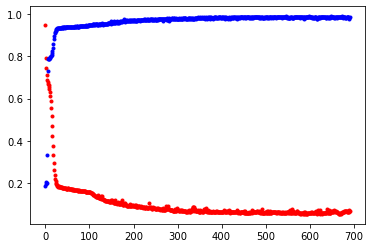

In [9]:
history = model.fit(X,y,validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

In [10]:
print('\n Accuracy: %.4f' % (model.evaluate(X, y)[1]))

61/61 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9805

 Accuracy: 0.9805
